In [5]:
import pandas as pd

# Importar o dataset
data = pd.read_csv("../../../../../data/interim/preprocessing/04_dataset_expo_rn_NO_OUTLIERS_featured_encoded.csv")
data_outubro = pd.read_csv("../../../../../data/interim/preprocessing/04_dataset_expo_rn_outubro_featured_encoded.csv")
data_outubro.dtypes

Países                        int64
Bloco Econômico               int64
Via                           int64
URF                           int64
Código NCM                    int64
Descrição NCM                 int64
Código SH6                    int64
Descrição SH6                 int64
Código SH4                    int64
Descrição SH4                 int64
Código SH2                    int64
Descrição SH2                 int64
Código Seção                  int64
Descrição Seção               int64
Unidade estatística           int64
Valor US$ FOB                 int64
Quilograma Líquido            int64
Quantidade Estatística        int64
Data                         object
Valor US$ FOB_mensal          int64
Quilograma Líquido_mensal     int64
Valor US$ FOB_anual           int64
Quilograma Líquido_anual      int64
dtype: object

In [6]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import joblib

# Criação do LabelEncoder
encoder = LabelEncoder()
encoder_outubro = LabelEncoder()

# Aplicar LabelEncoder nas colunas selecionadas, sobrescrevendo as colunas originais
data_encoded = data
data_encoded['Data'] = encoder.fit_transform(data['Data'])
data_outubro['Data'] = encoder_outubro.fit_transform(data_outubro['Data'])

# Visualizar o resultado
data_encoded.dtypes

Bloco Econômico              int64
Países                       int64
Via                          int64
URF                          int64
Código NCM                   int64
Descrição NCM                int64
Código SH6                   int64
Descrição SH6                int64
Código SH4                   int64
Descrição SH4                int64
Código SH2                   int64
Descrição SH2                int64
Código Seção                 int64
Descrição Seção              int64
Unidade estatística          int64
Valor US$ FOB                int64
Quilograma Líquido           int64
Quantidade Estatística       int64
Data                         int64
Valor US$ FOB_mensal         int64
Quilograma Líquido_mensal    int64
Valor US$ FOB_anual          int64
Quilograma Líquido_anual     int64
dtype: object

# Análise de correlação e PCA

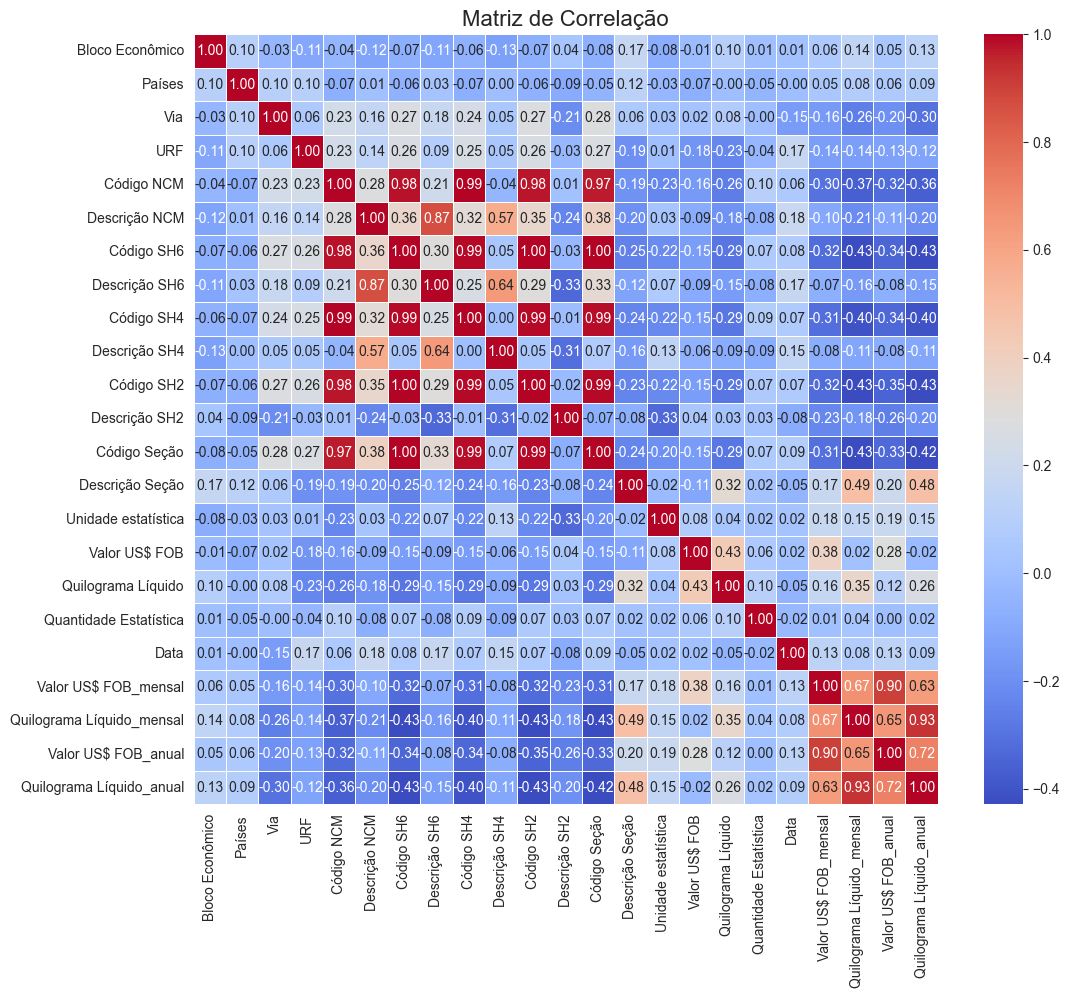

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a matriz de correlação
correlation_matrix = data.corr()

# Configurar o tamanho da figura
plt.figure(figsize=(12, 10))

# Criar o heatmap com seaborn
sns.heatmap(
    correlation_matrix,
    annot=True,  # Mostrar os valores numéricos na matriz
    fmt=".2f",   # Formatar os valores com duas casas decimais
    cmap="coolwarm",  # Mapa de cores
    linewidths=0.5,   # Largura das linhas que separam os quadrados
)

# Configurar o título
plt.title("Matriz de Correlação", fontsize=16)
plt.show()


Correlação com 'Valor US$ FOB_anual':
Valor US$ FOB_anual          1.000000
Valor US$ FOB_mensal         0.904705
Quilograma Líquido_anual     0.721072
Quilograma Líquido_mensal    0.650140
Valor US$ FOB                0.283223
Descrição Seção              0.196769
Unidade estatística          0.190333
Data                         0.126781
Quilograma Líquido           0.115952
Países                       0.058250
Bloco Econômico              0.048356
Quantidade Estatística       0.002085
Descrição SH6               -0.076102
Descrição SH4               -0.080129
Descrição NCM               -0.105572
URF                         -0.131010
Via                         -0.197124
Descrição SH2               -0.256807
Código NCM                  -0.322901
Código Seção                -0.333884
Código SH4                  -0.336338
Código SH6                  -0.343976
Código SH2                  -0.347310
Name: Valor US$ FOB_anual, dtype: float64


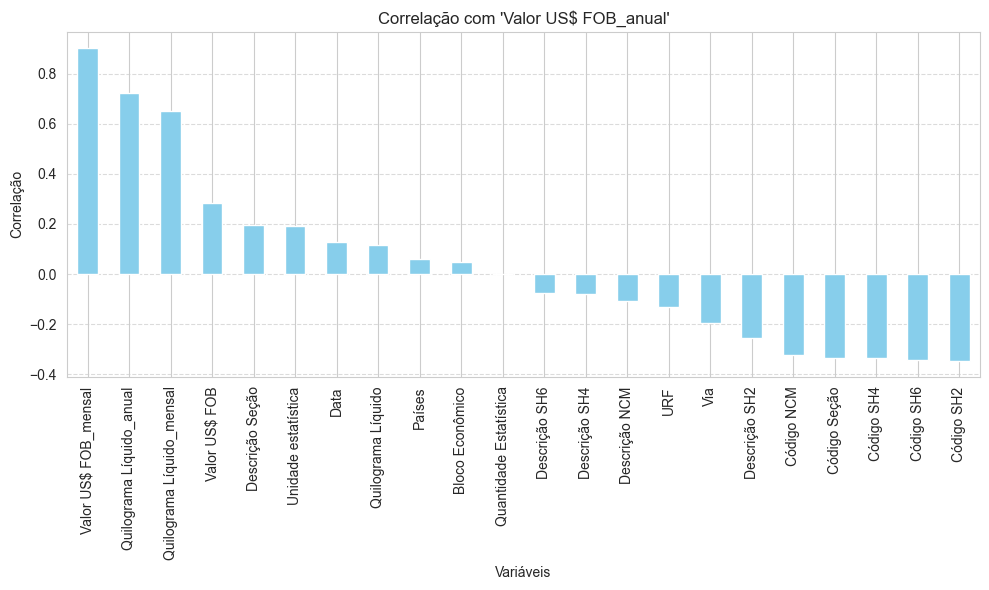

In [8]:
# Calcular a correlação da variável de interesse com as demais
correlations = data.corr()['Valor US$ FOB_anual'].sort_values(ascending=False)

# Exibir as correlações ordenadas
print("Correlação com 'Valor US$ FOB_anual':")
print(correlations)

# Visualizar como gráfico de barras
plt.figure(figsize=(10, 6))
correlations.drop('Valor US$ FOB_anual').plot(kind='bar', color='skyblue')
plt.title("Correlação com 'Valor US$ FOB_anual'")
plt.xlabel("Variáveis")
plt.ylabel("Correlação")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


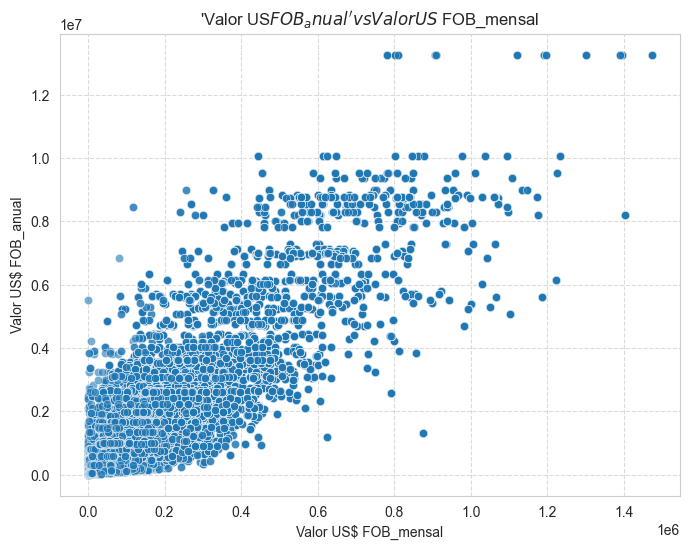

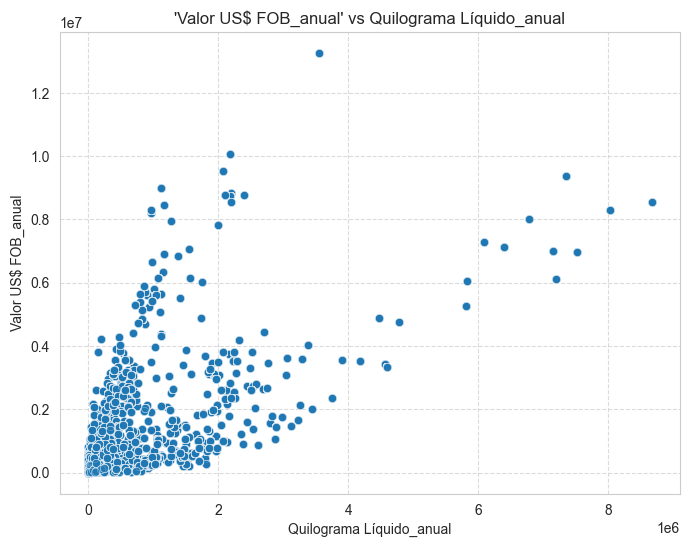

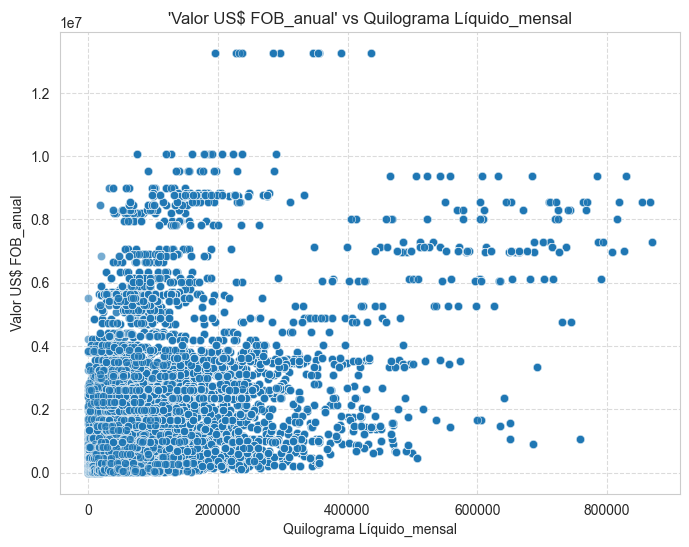

In [9]:
# Selecionar as variáveis mais correlacionadas (acima de 0.5 ou abaixo de -0.5)
high_corr_vars = correlations[(correlations > 0.5) | (correlations < -0.5)].index

# Criar scatter plots
for var in high_corr_vars:
    if var != 'Valor US$ FOB_anual':  # Ignorar a correlação com ela mesma
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=data[var], y=data['Valor US$ FOB_anual'], alpha=0.6)
        plt.title(f"'Valor US$ FOB_anual' vs {var}")
        plt.xlabel(var)
        plt.ylabel('Valor US$ FOB_anual')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()


In [10]:
import plotly.graph_objects as go
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separar variáveis explicativas (X) e variável-alvo (y)
X = data.drop(columns=['Valor US$ FOB_anual'])  # Remover a variável de interesse
y = data['Valor US$ FOB_anual']

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar o PCA
pca = PCA(n_components=min(X.shape[1], 10))  # Limitar a 10 componentes ou menos
X_pca = pca.fit_transform(X_scaled)

# Variância explicada acumulada
explained_variance = pca.explained_variance_ratio_

# Lista de cores diferentes para os componentes
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#8A2BE2', '#FF1493', '#20B2AA', '#FF4500', '#D2691E', '#ADFF2F']

# Criar gráficos interativos com plotly para contribuição de cada variável nos componentes
fig = go.Figure()

# Iterar sobre os componentes
for i in range(pca.n_components_):
    component_contributions = pd.Series(pca.components_[i], index=X.columns).sort_values(ascending=False)

    # Gráfico de barras interativo para cada componente com cor diferente
    fig.add_trace(go.Bar(
        x=component_contributions.index,
        y=component_contributions.values,
        name=f'PC{i+1}',
        opacity=0.7,
        marker=dict(color=colors[i % len(colors)]),  # Cor diferenciada para cada componente
        hovertemplate='<b>%{x}</b><br>Contribuição: %{y}<extra></extra>'  # Customização do hover
    ))

# Layout do gráfico
fig.update_layout(
    title="Contribuição das Variáveis em Cada Componente Principal",
    barmode='stack',  # Empilhar as barras (uma por componente)
    xaxis_title="Variáveis",
    yaxis_title="Contribuição",
    xaxis_tickangle=-45,
    template="plotly_dark",  # Escolha de tema
    height=600,
    hovermode="x unified"  # Mostrar o hover sobre as barras
)

# Exibir o gráfico
fig.show()

# Exibir variância explicada para os componentes (também interativo)
fig_variance = go.Figure()

fig_variance.add_trace(go.Bar(
    x=[f'PC{i+1}' for i in range(len(explained_variance))],
    y=explained_variance,
    marker=dict(color='coral'),
    hovertemplate='<b>%{x}</b><br>Variância Explicada: %{y}<extra></extra>'  # Customização do hover
))

fig_variance.update_layout(
    title="Variância Explicada por Cada Componente Principal",
    xaxis_title="Componentes Principais",
    yaxis_title="Proporção da Variância Explicada",
    template="plotly_dark",
    height=600,
    hovermode="x unified"
)

# Exibir gráfico da variância explicada
fig_variance.show()

In [11]:
#data = data.drop(["Unnamed: 0", "Descrição SH2", "Países"], axis = 1)

In [12]:
data_outubro

Países  Bloco Econômico  Via  URF  Código NCM  Descrição NCM  Código SH6  \
0         0                3    0    2          19             20       80720   
1         0                3    0    2          45             60      520922   
2         0                3    0    4          19             20       80720   
3         0                3    0   10          19             20       80720   
4         0                3    0   13          19             20       80720   
..      ...              ...  ...  ...         ...            ...         ...   
221      41                2    2   20          18             23       80719   
222      41                2    2   20          45             60      520922   
223      41                2    2   22          17             22       80711   
224      41                2    2   22          45             60      520922   
225      42                6    1   15          22              6      170490   

     Descrição SH6  Código SH4  Descrição SH4  ...  Descrição Seção  \
0               20          10             17  ...               12   
1               51          30             35  ...                3   
2               20          10             17  ...               12   
3               20          10             17  ...               12   
4               20          10             17  ...               12   
..             ...         ...            ...  ...              ...   
221             22          10             17  ...               12   
222             51          30             35  ...                3   
223             21          10             17  ...               12   
224             51          30             35  ...                3   
225             37          13             29  ...               11   

     Unidade estatística  Valor US$ FOB  Quilograma Líquido  \
0                      4          12788                9801   
1                      4            215                  96   
2                      4          43394               33958   
3                      4           1800                1800   
4                      4          42259               31124   
..                   ...            ...                 ...   
221                    4          15742               21330   
222                    4          17676                3422   
223                    4           8333               22176   
224                    4           5757                1046   
225                    4          49273               24893   

     Quantidade Estatística  Data  Valor US$ FOB_mensal  \
0                      9801     0               1524439   
1                        96     0                811265   
2                     33958     0               1524439   
3                      1800     0               1524439   
4                     31124     0               1524439   
..                      ...   ...                   ...   
221                   21330     0              17343784   
222                    3422     0                811265   
223                   22176     0               8220351   
224                    1046     0                811265   
225                   24893     0               1412743   

     Quilograma Líquido_mensal  Valor US$ FOB_anual  Quilograma Líquido_anual  
0                      1324675              1524439                   1324675  
1                       145440               811265                    145440  
2                      1324675              1524439                   1324675  
3                      1324675              1524439                   1324675  
4                      1324675              1524439                   1324675  
..                         ...                  ...                       ...  
221                   25287186             17343784                  25287186  
222                     145440               811265                    14

# Removendo valores da coluna a ser prevista

In [13]:
import numpy as np

# DataFrame original (mantém os valores)
data_outubro_com_valores = data_outubro.copy()

# DataFrame com a coluna preenchida com NaN
data_outubro_sem_valores = data_outubro.copy()
data_outubro_sem_valores['Valor US$ FOB_anual'] = np.nan


In [14]:
data_outubro_com_valores

Países  Bloco Econômico  Via  URF  Código NCM  Descrição NCM  Código SH6  \
0         0                3    0    2          19             20       80720   
1         0                3    0    2          45             60      520922   
2         0                3    0    4          19             20       80720   
3         0                3    0   10          19             20       80720   
4         0                3    0   13          19             20       80720   
..      ...              ...  ...  ...         ...            ...         ...   
221      41                2    2   20          18             23       80719   
222      41                2    2   20          45             60      520922   
223      41                2    2   22          17             22       80711   
224      41                2    2   22          45             60      520922   
225      42                6    1   15          22              6      170490   

     Descrição SH6  Código SH4  Descrição SH4  ...  Descrição Seção  \
0               20          10             17  ...               12   
1               51          30             35  ...                3   
2               20          10             17  ...               12   
3               20          10             17  ...               12   
4               20          10             17  ...               12   
..             ...         ...            ...  ...              ...   
221             22          10             17  ...               12   
222             51          30             35  ...                3   
223             21          10             17  ...               12   
224             51          30             35  ...                3   
225             37          13             29  ...               11   

     Unidade estatística  Valor US$ FOB  Quilograma Líquido  \
0                      4          12788                9801   
1                      4            215                  96   
2                      4          43394               33958   
3                      4           1800                1800   
4                      4          42259               31124   
..                   ...            ...                 ...   
221                    4          15742               21330   
222                    4          17676                3422   
223                    4           8333               22176   
224                    4           5757                1046   
225                    4          49273               24893   

     Quantidade Estatística  Data  Valor US$ FOB_mensal  \
0                      9801     0               1524439   
1                        96     0                811265   
2                     33958     0               1524439   
3                      1800     0               1524439   
4                     31124     0               1524439   
..                      ...   ...                   ...   
221                   21330     0              17343784   
222                    3422     0                811265   
223                   22176     0               8220351   
224                    1046     0                811265   
225                   24893     0               1412743   

     Quilograma Líquido_mensal  Valor US$ FOB_anual  Quilograma Líquido_anual  
0                      1324675              1524439                   1324675  
1                       145440               811265                    145440  
2                      1324675              1524439                   1324675  
3                      1324675              1524439                   1324675  
4                      1324675              1524439                   1324675  
..                         ...                  ...                       ...  
221                   25287186             17343784                  25287186  
222                     145440               811265                    14

In [15]:
data_outubro_sem_valores

Países  Bloco Econômico  Via  URF  Código NCM  Descrição NCM  Código SH6  \
0         0                3    0    2          19             20       80720   
1         0                3    0    2          45             60      520922   
2         0                3    0    4          19             20       80720   
3         0                3    0   10          19             20       80720   
4         0                3    0   13          19             20       80720   
..      ...              ...  ...  ...         ...            ...         ...   
221      41                2    2   20          18             23       80719   
222      41                2    2   20          45             60      520922   
223      41                2    2   22          17             22       80711   
224      41                2    2   22          45             60      520922   
225      42                6    1   15          22              6      170490   

     Descrição SH6  Código SH4  Descrição SH4  ...  Descrição Seção  \
0               20          10             17  ...               12   
1               51          30             35  ...                3   
2               20          10             17  ...               12   
3               20          10             17  ...               12   
4               20          10             17  ...               12   
..             ...         ...            ...  ...              ...   
221             22          10             17  ...               12   
222             51          30             35  ...                3   
223             21          10             17  ...               12   
224             51          30             35  ...                3   
225             37          13             29  ...               11   

     Unidade estatística  Valor US$ FOB  Quilograma Líquido  \
0                      4          12788                9801   
1                      4            215                  96   
2                      4          43394               33958   
3                      4           1800                1800   
4                      4          42259               31124   
..                   ...            ...                 ...   
221                    4          15742               21330   
222                    4          17676                3422   
223                    4           8333               22176   
224                    4           5757                1046   
225                    4          49273               24893   

     Quantidade Estatística  Data  Valor US$ FOB_mensal  \
0                      9801     0               1524439   
1                        96     0                811265   
2                     33958     0               1524439   
3                      1800     0               1524439   
4                     31124     0               1524439   
..                      ...   ...                   ...   
221                   21330     0              17343784   
222                    3422     0                811265   
223                   22176     0               8220351   
224                    1046     0                811265   
225                   24893     0               1412743   

     Quilograma Líquido_mensal  Valor US$ FOB_anual  Quilograma Líquido_anual  
0                      1324675                  NaN                   1324675  
1                       145440                  NaN                    145440  
2                      1324675                  NaN                   1324675  
3                      1324675                  NaN                   1324675  
4                      1324675                  NaN                   1324675  
..                         ...                  ...                       ...  
221                   25287186                  NaN                  25287186  
222                     145440                  NaN                    14

# Track MLFlow

In [17]:
import mlflow
mlflow.set_tracking_uri("http://localhost:8080")

# Treinando árvore de decisão

In [16]:
print("oi")

oi


In [35]:
import mlflow

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Identificar preditores e resposta
x = data_encoded.drop(columns=["Valor US$ FOB_anual"])  # Remover a coluna de resposta
y = data_encoded["Valor US$ FOB_anual"]

# Dividir o dataset em treinamento (80%) e teste (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Definir o modelo com hiperparâmetros simples
regressor = DecisionTreeRegressor(
    max_depth=8,
    min_samples_split=10,
    min_samples_leaf=2,
    criterion='squared_error',
    random_state=1
)
mlflow.set_experiment("DecisionTreeRegressor_8Depth")  # Substitua pelo nome desejado

# Iniciar o registro no MLflow
with mlflow.start_run():
    print("Inicio...")
    # Treinar o modelo
    regressor.fit(x_train, y_train)

    # Realizar previsões no conjunto de teste
    y_pred = regressor.predict(x_test)

    # Avaliação do modelo
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    # Log das métricas no MLflow
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)

    # (Opcional) Log do modelo
    mlflow.sklearn.log_model(regressor, "h2o_autoML")

    # Exibição das métricas no console
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print("R² Score:", r2)


2024/11/27 14:22:26 INFO mlflow.tracking.fluent: Experiment with name 'DecisionTreeRegressor_8Depth' does not exist. Creating a new experiment.


Inicio...


C:\Users\joao1\DataspellProjects\analise_exportacoes_rn\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

2024/11/27 14:22:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Mean Absolute Error (MAE): 271985.2472438517
Mean Squared Error (MSE): 262287616776.13623
Root Mean Squared Error (RMSE): 512140.2315539526
R² Score: 0.9591940591046766
🏃 View run funny-lamb-227 at: http://localhost:8080/#/experiments/222862534105789614/runs/2c9d1ee5fb2c44f68385920dfa8ebfd9
🧪 View experiment at: http://localhost:8080/#/experiments/222862534105789614


In [37]:
import numpy as np

# DataFrame original (mantém os valores)
data_outubro_com_valores = data_outubro.copy()

# DataFrame com a coluna preenchida com NaN
data_outubro_sem_valores = data_outubro.copy()
data_outubro_sem_valores['Valor US$ FOB_anual'] = np.nan

# Separar os preditores do DataFrame com valores NaN
x_outubro_sem_valores = data_outubro_sem_valores.drop(columns=["Valor US$ FOB_anual"])

# Garantir que a ordem das colunas é a mesma do treinamento
x_outubro_sem_valores = x_outubro_sem_valores[x_train.columns]

# Aplicar o modelo para prever os valores
previsoes = regressor.predict(x_outubro_sem_valores)

# Inserir as previsões de volta ao DataFrame com NaN
data_outubro_sem_valores["Valor US$ FOB_anual"] = previsoes



In [34]:
import pandas as pd

# Supondo que 'data_outubro_com_valores' contém os valores reais
# e 'data_outubro_sem_valores' contém as previsões

# Recuperar os valores reais e previstos
valores_reais = data_outubro_com_valores["Valor US$ FOB_anual"]
valores_previstos = data_outubro_sem_valores["Valor US$ FOB_anual"]

# Calcular o erro absoluto
erro_absoluto = abs(valores_reais - valores_previstos)

# Calcular o erro percentual relativo (opcional)
erro_percentual = abs((valores_reais - valores_previstos) / valores_reais) * 100

# Criar um DataFrame para comparação
df_comparacao = pd.DataFrame({
    "Valor Real": valores_reais,
    "Valor Previsto": valores_previstos,
    "Erro Absoluto": erro_absoluto,
    "Erro Percentual (%)": erro_percentual
})

# Exibir o DataFrame
df_comparacao


Valor Real  Valor Previsto  Erro Absoluto  Erro Percentual (%)
0       1524439    8.759882e+06   7.235443e+06           474.629880
1        811265    1.250939e+06   4.396739e+05            54.196084
2       1524439    8.759882e+06   7.235443e+06           474.629880
3       1524439    8.759882e+06   7.235443e+06           474.629880
4       1524439    8.759882e+06   7.235443e+06           474.629880
..          ...             ...            ...                  ...
221    17343784    1.327285e+07   4.070938e+06            23.472029
222      811265    1.250939e+06   4.396739e+05            54.196084
223     8220351    1.327285e+07   5.052495e+06            61.463251
224      811265    1.250939e+06   4.396739e+05            54.196084
225     1412743    2.530697e+06   1.117954e+06            79.133563

[226 rows x 4 columns]

# Árvore de decisão com novo dataset

In [43]:
import pandas as pd

# Importar o dataset
df_mes = pd.read_csv("../../../../../data/interim/preprocessing/03_dataset_expo_rn_fob_mensal.csv")
df_mes

Data  Código SH6  Valor US$ FOB Mensal
0      1997-01       30269                  3395
1      1997-01       30611                600068
2      1997-01       51199                  5220
3      1997-01       80132               1773030
4      1997-01       80300                 62229
...        ...         ...                   ...
19838  2024-09      820510                  2775
19839  2024-09      841221                  1401
19840  2024-09      842519                  8125
19841  2024-09      854929                134857
19842  2024-09      960621                  1604

[19843 rows x 3 columns]

In [45]:
from sklearn.preprocessing import LabelEncoder

# Instanciar o LabelEncoder
le = LabelEncoder()

# Codificar as colunas individualmente
df_mes['Código SH6'] = le.fit_transform(df_mes['Código SH6'])
df_mes['Data'] = le.fit_transform(df_mes['Data'])

# Exibir o resultado
df_mes

Data  Código SH6  Valor US$ FOB Mensal
0         0          16                  3395
1         0          63                600068
2         0          86                  5220
3         0         109               1773030
4         0         112                 62229
...     ...         ...                   ...
19838   332         909                  2775
19839   332         946                  1401
19840   332         993                  8125
19841   332        1194                134857
19842   332        1305                  1604

[19843 rows x 3 columns]

In [52]:
import mlflow
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Separar preditores (X) e resposta (y)
X = df_mes[['Código SH6', 'Data']]  # Variáveis independentes
y = df_mes['Valor US$ FOB Mensal']  # Variável dependente

# Dividir o dataset em treinamento (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir o modelo base
model = DecisionTreeRegressor(random_state=42)

# Configurar os hiperparâmetros para o GridSearch
param_grid = {
    'max_depth': [3, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'criterion': ['squared_error', 'friedman_mse']
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # Número de folds para validação cruzada
    scoring='neg_mean_absolute_error',  # Métrica de avaliação (MAE negativo)
    verbose=2,
    n_jobs=-1  # Usar todos os núcleos disponíveis
)

# Iniciar o experimento no MLflow
with mlflow.start_run():

    # Nomear o experimento de acordo com o modelo
    mlflow.set_experiment("Decision_Tree_Regressor_Model_GridSearchCV")

    # Executar o GridSearchCV
    grid_search.fit(X_train, y_train)

    # Exibir os melhores hiperparâmetros
    print("Melhores Hiperparâmetros:", grid_search.best_params_)

    # Treinar o modelo com os melhores hiperparâmetros
    best_model = grid_search.best_estimator_

    # Avaliar no conjunto de teste
    y_pred = best_model.predict(X_test)

    # Avaliação do modelo
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Log das métricas no MLflow
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("r2", r2)

    # (Opcional) Log do modelo
    mlflow.sklearn.log_model(best_model, "decision_tree_regressor_model")

    # Exibir métricas no console
    print(f"MAE (Mean Absolute Error): {mae:.2f}")
    print(f"MSE (Mean Squared Error): {mse:.2f}")
    print(f"R² Score: {r2:.2f}")


2024/11/27 14:34:52 INFO mlflow.tracking.fluent: Experiment with name 'Decision_Tree_Regressor_Model_GridSearchCV' does not exist. Creating a new experiment.


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Melhores Hiperparâmetros: {'criterion': 'squared_error', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}


2024/11/27 14:35:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MAE (Mean Absolute Error): 352441.91
MSE (Mean Squared Error): 7608813995696.29
R² Score: 0.40
🏃 View run intrigued-fly-327 at: http://localhost:8080/#/experiments/222862534105789614/runs/929c03f74afc448399604d0b15b31503
🧪 View experiment at: http://localhost:8080/#/experiments/222862534105789614
